In [2]:
from main import load_data
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from datetime import datetime, timedelta
import dill
from autoML.autoML import AutoML
from autoML.utils import evaluate_regression
matplotlib.rcParams.update({'font.size': 12})

In [3]:
pkl_path = 'pkl/autoML_250209_055146.pkl'

with open(pkl_path, 'rb') as f:
    autoML = dill.load(f) 

X_train, y_train, X_test, y_test = load_data('data')
y_train_pred = autoML.predict(X_train)
y_test_pred = autoML.predict(X_test)

train_score = evaluate_regression(X_train, y_train, y_train_pred, 'train') 
test_score = evaluate_regression(X_test, y_test, y_test_pred, 'test')


Evaluation for train:
R2 Score: 0.9593
Adjusted R2 Score: 0.9592
Mean Absolute Error (MAE): 4.2010
Root Mean Squared Error (RMSE): 7.1655

Evaluation for test:
R2 Score: -3.1581
Adjusted R2 Score: -3.1993
Mean Absolute Error (MAE): 12.9593
Root Mean Squared Error (RMSE): 15.6303


ValueError: 'upper_right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

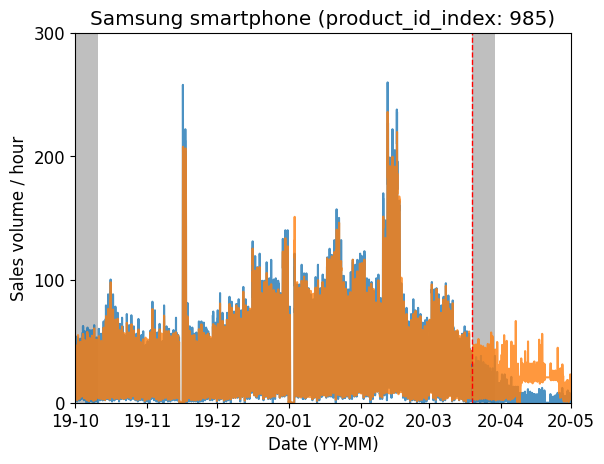

In [ ]:
train_time = y_train.index
test_time = y_test.index
train_time_start = datetime(2019, 10, 1)
test_time_start = test_time[0]
test_time_end = datetime(2020, 5, 1)



td = timedelta(days=10)

def plot(title="", axvspan=True, xlabel='Date (YY-MM)', DateFormatter='%y-%m', xlim=[train_time_start, test_time_end], ylim=[0, 300], yticks=range(0, 400, 100)):
    fig, ax = plt.subplots()
    ax.plot(train_time, y_train, color='tab:blue', alpha=0.8, label="GT")
    ax.plot(train_time, y_train_pred, color='tab:orange', alpha=0.8, label="Pred")

    ax.plot(test_time, y_test, color='tab:blue', alpha=0.8)
    ax.plot(test_time, y_test_pred, color='tab:orange', alpha=0.8)
    ax.axvline(x=test_time_start, color='r', linestyle='--', linewidth=1)

    if axvspan:
        ax.axvspan(train_time_start, train_time_start+td, facecolor='gray', alpha=0.5)
        ax.axvspan(test_time_start, test_time_start+td, facecolor='gray', alpha=0.5)

    ax.set_yticks(yticks)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Sales volume / hour")
    ax.xaxis.set_major_formatter(mdates.DateFormatter(DateFormatter))
    ax.set_title(title)
    ax.legend(loc='upper right')

    

plot(title="Samsung smartphone (product_id_index: 985)")
plot(title="Samsung smartphone (product_id_index: 985)", xlabel="Date (19-10-DD)", axvspan=False, xlim=[train_time_start, train_time_start+td], DateFormatter='%d', ylim=[0, 100], yticks=[0, 50, 100])
plot(title="Samsung smartphone (product_id_index: 985)", xlabel="Date (20-03-DD)", axvspan=False, xlim=[test_time_start, test_time_start+td], DateFormatter='%d', ylim=[0, 100], yticks=[0, 50, 100])